# Import Section

In [2]:
import numpy as np
import qiskit as qk
from qiskit.utils import QuantumInstance
from qiskit_quantum_knn.qknn import QKNeighborsClassifier
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
import time

# Preprocessing Section

## Mask Reading 

In [3]:
def Mask_Reading(PATH):
    mask_array = [] #array which'll hold the images
    # path = f'C:\\Users\\Ahmad Zaki\\Documents\\Catatan\\1. TA AZAM\\Code Program\\mask\\Mask Output'
    files = glob.glob (str(PATH)+"/*.jpg")
    #Loop to store the mask to mask array
    for myFile in files:
        mask = cv2.imread (myFile,0) #0 untuk gray form, sedangkan 1 untuk color form1
        (thresh, BWmask) = cv2.threshold(mask, 127, 1, cv2.THRESH_BINARY) #Store them in Black and White 0-1 form 
        mask_array.append (BWmask) #append each image to array

    #this will print the channel number, size, and number of images in the file
    print('mask_array shape:', np.array(mask_array).shape) 
    return mask_array

In [4]:
Path = "C:\\Users\Admin\Documents/Quantum/mask/Lite Mask Output/train"
train_mask = Mask_Reading(Path)

mask_array shape: (14, 32, 32)


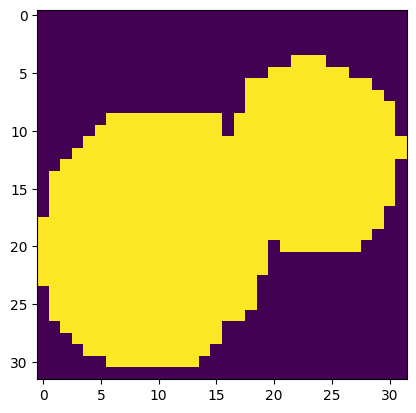

In [5]:
#Show the example of the mask
# img = cv2.cvtColor(mask_array[6], cv2.COLOR_BGR2RGB)
plt.imshow(train_mask[6])
plt.show()

Karena Mask akan digunakan sebagai label, maka perlu dilakukan flattening

In [6]:
labels = np.array(train_mask)
label = labels.flatten()
print("shape before flattening",labels.shape,'Shape after labeling show how many points', label.shape)

shape before flattening (14, 32, 32) Shape after labeling show how many points (14336,)


In [7]:
valid_mask_Path = "C:\\Users\Admin\Documents/Quantum/mask/Lite Mask Output/valid"
valid_mask = Mask_Reading(valid_mask_Path)

valid_labels = np.array(valid_mask)
valid_label = valid_labels.flatten()
print("shape before flattening",valid_labels.shape,'Shape after labeling show how many points', valid_label.shape)

mask_array shape: (4, 32, 32)
shape before flattening (4, 32, 32) Shape after labeling show how many points (4096,)


## Image Reading

In [8]:
def Reading_Images(PATH):
    image_array = [] #array which'll hold the images
    files = glob.glob (str(PATH)+"\*.jpg")
    #Loop to store the mask to mask array
    for myFile in files:
        image = cv2.imread (myFile,1) #0 untuk gray form, sedangkan 1 untuk color form
        image_array.append (image) #append each image to array

    #this will print the channel number, size, and number of images in the file
    print('mask_array shape:', np.array(image_array).shape) 
    return image_array

In [9]:
def Image_Flattening(Image_Array):
    RGB_point = np.array(Image_Array)
    NGambar, H, W, C = RGB_point.shape
    Flatten_Array = RGB_point.reshape(NGambar*H*W,3)
    print("Ukuran sebelum flatten = ",RGB_point.shape, 
          "\nSesudah di flatten = ",Flatten_Array.shape)
    return Flatten_Array

Process The Image 

In [10]:
Image_Train_Path = "C:\\Users\Admin\Documents\Quantum\Lite Apple Image/train"
Image_Train = Reading_Images(Image_Train_Path)
x_train = Image_Flattening(Image_Train)

mask_array shape: (14, 32, 32, 3)
Ukuran sebelum flatten =  (14, 32, 32, 3) 
Sesudah di flatten =  (14336, 3)


In [11]:
Image_Valid_Path = "C:\\Users\Admin\Documents\Quantum\Lite Apple Image/valid"
Image_Valid = Reading_Images(Image_Valid_Path)
x_valid = Image_Flattening(Image_Valid)

mask_array shape: (4, 32, 32, 3)
Ukuran sebelum flatten =  (4, 32, 32, 3) 
Sesudah di flatten =  (4096, 3)


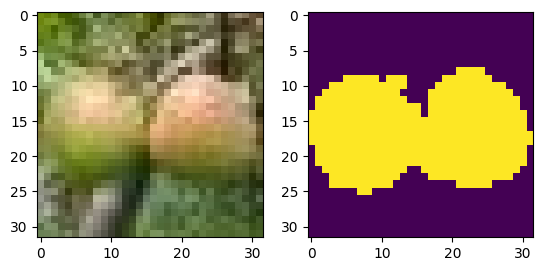

In [12]:
img = cv2.cvtColor(Image_Train[5], cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 1)
plt.imshow(img)
#
plt.subplot(1, 2, 2)
plt.imshow(train_mask[5])
plt.show()

NOTE : Sepertinya ada kesalahan pembacaan dari segi urutan antara image dan mask

In [13]:
x_train = Image_Flattening(Image_Train)

Ukuran sebelum flatten =  (14, 32, 32, 3) 
Sesudah di flatten =  (14336, 3)


# QKNN Section

## Encode Data

In [14]:
from qiskit_quantum_knn.encoding import analog

#Change the dtype of data to be float for safety encoding
x_train = x_train.astype(float)
#Encoding
encoded_x_train = analog.encode(x_train)
print(encoded_x_train,"\n batas pemisah x_train \n", x_train)

#Padding data to be 2^n dimensional with n=2
encoded_x_train = np.pad(encoded_x_train, ((0,0),(0,1)), mode='constant', constant_values=(0))
print(encoded_x_train)

[[0.41905864 0.74003973 0.52605234]
 [0.40426159 0.73272414 0.54743758]
 [0.43524549 0.68103117 0.58886154]
 ...
 [0.28912725 0.75173085 0.59271086]
 [0.10423455 0.8338764  0.54201966]
 [0.17568209 0.80813762 0.5621827 ]] 
 batas pemisah x_train 
 [[ 47.  83.  59.]
 [ 48.  87.  65.]
 [ 85. 133. 115.]
 ...
 [ 20.  52.  41.]
 [  5.  40.  26.]
 [ 10.  46.  32.]]
[[0.41905864 0.74003973 0.52605234 0.        ]
 [0.40426159 0.73272414 0.54743758 0.        ]
 [0.43524549 0.68103117 0.58886154 0.        ]
 ...
 [0.28912725 0.75173085 0.59271086 0.        ]
 [0.10423455 0.8338764  0.54201966 0.        ]
 [0.17568209 0.80813762 0.5621827  0.        ]]


In [15]:
#Change the dtype of data to be float for safety encoding
x_valid = x_valid.astype(float)
#Encoding
encoded_x_valid = analog.encode(x_valid)
print(encoded_x_valid,"\n batas pemisah x_train \n", x_valid)

#Padding data to be 2^n dimensional with n=2
encoded_x_valid = np.pad(encoded_x_valid, ((0,0),(0,1)), mode='constant', constant_values=(0))
print(encoded_x_valid)

[[0.3286405  0.76360587 0.55578908]
 [0.33810674 0.76193068 0.55239974]
 [0.36245997 0.75353521 0.54845917]
 ...
 [0.59534613 0.67548888 0.43506063]
 [0.5604852  0.69774688 0.44610047]
 [0.560574   0.6726888  0.48295606]] 
 batas pemisah x_train 
 [[ 68. 158. 115.]
 [ 71. 160. 116.]
 [ 76. 158. 115.]
 ...
 [ 52.  59.  38.]
 [ 49.  61.  39.]
 [ 65.  78.  56.]]
[[0.3286405  0.76360587 0.55578908 0.        ]
 [0.33810674 0.76193068 0.55239974 0.        ]
 [0.36245997 0.75353521 0.54845917 0.        ]
 ...
 [0.59534613 0.67548888 0.43506063 0.        ]
 [0.5604852  0.69774688 0.44610047 0.        ]
 [0.560574   0.6726888  0.48295606 0.        ]]


In [7]: A  # Input: A numpy array
Out[7]: 
array([[1, 2],
       [2, 3]])

In [8]: np.lib.pad(A, ((0,1),(0,2)), 'constant', constant_values=(0))
Out[8]: 
array([[1, 2, 0, 0],
       [2, 3, 0, 0],
       [0, 0, 0, 0]])  # Zero padded numpy array

## QKNN Secara Terpisah

In [16]:
#Make Circuit
from qiskit_quantum_knn.qknn.qknn_construction import create_qknn

start = time.time()
MyQKNN = create_qknn(state_to_classify = encoded_x_valid, classified_states = encoded_x_train, add_measurement=True)
end = time.time() - start
print("Waktu tempuh pembuatan qknn circuit adalah ", end)

Ukuran Train data:  (14336, 4)


c:\Users\Admin\Documents\Quantum\1.02 qiskit-quantum-knn-master - Copy\qiskit_quantum_knn\qknn\qknn_construction.py:206: UserWarning: Number of training states not a positive power of 2,adding extra qubit to comply.
  warnings.warn("Number of training states not a positive power of 2,"


KeyboardInterrupt: 

In [19]:
np.log2(14336)

13.807354922057604

In [17]:
from qiskit_quantum_knn.qknn import QKNeighborsClassifier
backend = qk.BasicAer.get_backend('qasm_simulator')
instance = QuantumInstance(backend, shots=500)

# initialising the qknn model
qknn = QKNeighborsClassifier(
    n_neighbors=20,
    quantum_instance=instance
)

In [18]:
Start = time.time()
AutoCircuit = qknn.construct_circuits(data_to_predict = encoded_x_valid[:2], training_data = encoded_x_train[:64])
end = time.time()- Start
print(end)

Ukuran Train data:  (64, 4)
Bentuk dari circuit yang digunakan adalah 
                                           ░ ┌───┐                 ┌───┐ ░ ┌─┐»
            control: ─────────────────────░─┤ H ├────────────■──■─┤ H ├─░─┤M├»
                     ┌──────────────────┐ ░ └───┘            │  │ └───┘ ░ └╥┘»
state_to_classify_0: ┤0                 ├─░──────────────────X──┼───────░──╫─»
                     │  Init test state │ ░                  │  │       ░  ║ »
state_to_classify_1: ┤1                 ├─░──────────────────┼──X───────░──╫─»
                     └──────────────────┘ ░      ┌─────────┐ │  │       ░  ║ »
     train_states_0: ─────────────────────░──────┤0        ├─X──┼───────░──╫─»
                                          ░      │         │    │       ░  ║ »
     train_states_1: ─────────────────────░──────┤1        ├────X───────░──╫─»
                                          ░ ┌───┐│         │            ░  ║ »
       comp_basis_0: ─────────────────────░─┤ H ├┤2        

In [23]:
Start = time.time()
AutoCircuit2 = qknn.construct_circuits(data_to_predict = encoded_x_valid[:2], training_data = encoded_x_train[:256])
end = time.time()- Start
print(end)

Ukuran Train data:  (256, 4)
Bentuk dari circuit yang digunakan adalah 
                                           ░ ┌───┐                 ┌───┐ ░ ┌─┐»
            control: ─────────────────────░─┤ H ├────────────■──■─┤ H ├─░─┤M├»
                     ┌──────────────────┐ ░ └───┘            │  │ └───┘ ░ └╥┘»
state_to_classify_0: ┤0                 ├─░──────────────────X──┼───────░──╫─»
                     │  Init test state │ ░                  │  │       ░  ║ »
state_to_classify_1: ┤1                 ├─░──────────────────┼──X───────░──╫─»
                     └──────────────────┘ ░      ┌─────────┐ │  │       ░  ║ »
     train_states_0: ─────────────────────░──────┤0        ├─X──┼───────░──╫─»
                                          ░      │         │    │       ░  ║ »
     train_states_1: ─────────────────────░──────┤1        ├────X───────░──╫─»
                                          ░ ┌───┐│         │            ░  ║ »
       comp_basis_0: ─────────────────────░─┤ H ├┤2       

In [24]:
AutoCircuitResult = qknn.get_circuit_results(
    AutoCircuit
)

Sedang Mengeksekusi circuit


In [40]:
np.log2(256)

8.0

In [ ]:
AutoCircuitResult

[{'100001 0': 4, '110010 0': 8, '000000 0': 7, '111010 0': 6, '110101 0': 8, '001000 0': 9, '000011 0': 12, '110001 0': 7, '101110 0': 3, '001111 0': 5, '101001 0': 8, '011011 0': 6, '011001 0': 4, '110000 0': 8, '111110 0': 16, '100110 0': 8, '010000 0': 6, '111100 0': 5, '011010 0': 7, '111000 0': 9, '111111 0': 7, '100100 0': 7, '010110 0': 8, '000101 0': 13, '101011 0': 9, '110110 0': 8, '011010 1': 2, '001110 0': 9, '011110 0': 10, '110100 0': 11, '111011 0': 2, '010010 0': 3, '101010 0': 9, '011101 0': 8, '011000 0': 6, '010111 0': 9, '111101 0': 9, '101000 0': 9, '110111 0': 9, '000100 0': 5, '101100 0': 4, '011110 1': 1, '001101 0': 7, '000111 0': 7, '101101 0': 9, '010001 0': 12, '101111 0': 8, '001011 0': 6, '110011 0': 12, '100000 0': 10, '100101 0': 7, '000110 0': 6, '000001 0': 13, '011111 0': 7, '001100 0': 6, '010011 0': 9, '011100 0': 3, '111001 0': 7, '100011 0': 6, '100010 0': 9, '001001 0': 5, '100111 0': 9, '010101 0': 9, '010100 0': 8, '111011 1': 1, '101100 1': 1,

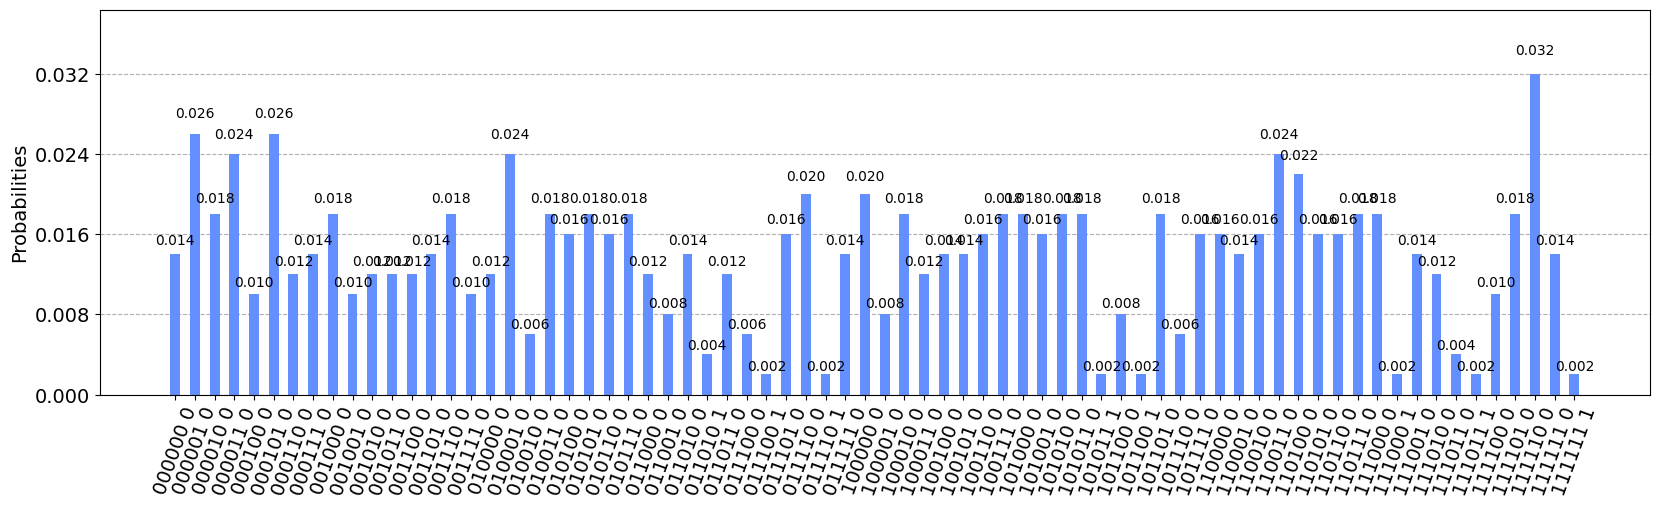

In [33]:
from qiskit.visualization import plot_histogram
Auto_all_counts = AutoCircuitResult.get_counts()
print(Auto_all_counts)
plot_histogram(Auto_all_counts[0], figsize=(20, 5))

In [38]:
MyAutoFidelities =  qknn.get_all_fidelities(AutoCircuitResult)
print(MyAutoFidelities, MyAutoFidelities.shape )

The number of qubits is  6
Calculate the fidelities
Calculate the fidelities
Fidelities has got!
[[0.996256 1.023904 1.005472 1.019296 0.98704  1.023904 0.991648 0.996256
  1.005472 0.98704  0.991648 0.991648 0.991648 0.996256 1.005472 0.98704
  0.991648 1.019296 0.977824 1.005472 1.000864 1.005472 1.000864 1.005472
  0.991648 0.982432 0.493472 0.991648 0.726432 1.000864 0.758688 0.996256
  1.01008  0.982432 1.005472 0.991648 0.996256 0.996256 1.000864 1.005472
  1.005472 1.000864 1.005472 0.75408  0.73104  1.005472 0.977824 1.000864
  1.000864 0.996256 1.000864 1.019296 1.014688 1.000864 1.000864 1.005472
  0.75408  0.996256 0.991648 0.721824 0.98704  1.005472 1.037728 0.744864]
 [1.03984  1.0168   0.9784   0.74544  1.0168   0.9784   0.76848  0.9784
  0.76848  0.97072  1.00144  0.98608  0.98608  1.0552   1.0168   0.73008
  0.98608  1.03216  1.00144  1.00912  0.99376  0.75312  0.51248  1.00912
  0.96304  1.03216  0.99376  0.7608   0.7608   0.9784   0.74544  1.04752
  0.99376  0.99376  

In [39]:
predicted_labels = qknn.majority_vote(
            labels = label[:64],
            fidelities = MyAutoFidelities
        )
print(predicted_labels)

Doing the majority vote
Nilai Fidelities :  [[0.996256 1.023904 1.005472 1.019296 0.98704  1.023904 0.991648 0.996256
  1.005472 0.98704  0.991648 0.991648 0.991648 0.996256 1.005472 0.98704
  0.991648 1.019296 0.977824 1.005472 1.000864 1.005472 1.000864 1.005472
  0.991648 0.982432 0.493472 0.991648 0.726432 1.000864 0.758688 0.996256
  1.01008  0.982432 1.005472 0.991648 0.996256 0.996256 1.000864 1.005472
  1.005472 1.000864 1.005472 0.75408  0.73104  1.005472 0.977824 1.000864
  1.000864 0.996256 1.000864 1.019296 1.014688 1.000864 1.000864 1.005472
  0.75408  0.996256 0.991648 0.721824 0.98704  1.005472 1.037728 0.744864]
 [1.03984  1.0168   0.9784   0.74544  1.0168   0.9784   0.76848  0.9784
  0.76848  0.97072  1.00144  0.98608  0.98608  1.0552   1.0168   0.73008
  0.98608  1.03216  1.00144  1.00912  0.99376  0.75312  0.51248  1.00912
  0.96304  1.03216  0.99376  0.7608   0.7608   0.9784   0.74544  1.04752
  0.99376  0.99376  1.00912  1.0168   1.00144  0.97072  0.9784   0.97072


C:\Users\Admin\Documents\Quantum\1.02 qiskit-quantum-knn-master - Copy\qiskit_quantum_knn\qknn\qkneighborsclassifier.py:575: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  votes, counts = stats.mode(voter_labels, axis=1)


In [ ]:
#Tuning Parameter of k-Neighbors
Neighbors = [*range(10, 2000, 200)]
SHOTS = [*range(100,450,150)] 



for k_neighbor in Neighbors:
    for shot  in SHOTS:    
        qknn = QKNeighborsClassifier(
            n_neighbors=k_neighbor,
            quantum_instance=instance
        )

        Start       = time.time()
        AutoCircuit = qknn.construct_circuits(
            data_to_predict=encoded_x_valid,
            training_data=encoded_x_train)
        end         = time.time() - Start
        print("Time for creating the circuits", end)

        AutoCircuitResult   = qknn.get_circuit_results(AutoCircuit)
        Auto_all_counts     = AutoCircuitResult.get_counts()
        MyAutoFidelities = qknn.get_all_fidelities(AutoCircuitResult)

        predicted_label = qknn.majority_vote(
            labels  = train_label,
            fidelities=MyAutoFidelities
        )
        Dice_Value = DICE_COE(mask = valid_label, Prediction = predicted_label)
        Jaccard_Value = jaccard_score(predicted_label, valid_label)


        #Status Check
        print('Got result for k_neighbors =',k_neighbor,' with shot = ', shot)
        print('Metric evaluation result         Dice Score ',Dice_Value, '          Jaccard Score', Jaccard_Value )
        


In [25]:
import sys
def sizeof_fmt(num, suffix='B'):
    ''' by Fred Cirera,  https://stackoverflow.com/a/1094933/1870254, modified'''
    for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
        if abs(num) < 1024.0:
            return "%3.1f %s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f %s%s" % (num, 'Yi', suffix)

for name, size in sorted(((name, sys.getsizeof(value)) for name, value in list(
                          locals().items())), key= lambda x: -x[1])[:20]:
    print("{:>30}: {:>8}".format(name, sizeof_fmt(size)))

               encoded_x_train: 448.1 KiB
                       x_train: 336.1 KiB
               encoded_x_valid: 128.1 KiB
                       x_valid: 96.1 KiB
                        labels: 14.1 KiB
                         label: 14.1 KiB
                   valid_label: 14.1 KiB
                  valid_labels:  4.1 KiB
                           img:  3.1 KiB
               QuantumInstance:  1.4 KiB
         QKNeighborsClassifier:  1.2 KiB
                           _i2:  765.0 B
                          _iii:  595.0 B
                          _i22:  595.0 B
                          _i25:  595.0 B
                           _i7:  552.0 B
                          _i13:  463.0 B
                          _i14:  415.0 B
                           _i6:  356.0 B
                           _i8:  351.0 B


## Training QKNN

In [17]:
# initialising the quantum instance
backend = qk.BasicAer.get_backend('qasm_simulator')
instance = QuantumInstance(backend, shots=100)

# initialising the qknn model
qknn = QKNeighborsClassifier(
   n_neighbors=10,
   quantum_instance=instance
)

In [18]:
qknn.fit(encoded_data[:16],  label[:16])
qknn_prediction = qknn.predict(encoded_data[:2])

print(qknn_prediction)
print(test_label)

Ukuran Train data:  (16, 4)
                                          ░ ┌───┐                 ┌───┐ ░ ┌─┐»
            control: ─────────────────────░─┤ H ├────────────■──■─┤ H ├─░─┤M├»
                     ┌──────────────────┐ ░ └───┘            │  │ └───┘ ░ └╥┘»
state_to_classify_0: ┤0                 ├─░──────────────────X──┼───────░──╫─»
                     │  Init test state │ ░                  │  │       ░  ║ »
state_to_classify_1: ┤1                 ├─░──────────────────┼──X───────░──╫─»
                     └──────────────────┘ ░      ┌─────────┐ │  │       ░  ║ »
     train_states_0: ─────────────────────░──────┤0        ├─X──┼───────░──╫─»
                                          ░      │         │    │       ░  ║ »
     train_states_1: ─────────────────────░──────┤1        ├────X───────░──╫─»
                                          ░ ┌───┐│         │            ░  ║ »
       comp_basis_0: ─────────────────────░─┤ H ├┤2        ├────────────░──╫─»
                        

C:\Users\Admin\Documents\Quantum\1.02 qiskit-quantum-knn-master - Copy\qiskit_quantum_knn\qknn\qkneighborsclassifier.py:565: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  votes, counts = stats.mode(voter_labels, axis=1)


NameError: name 'test_label' is not defined

# Evaluation Section

In [41]:
np.log2(14336)

13.807354922057604

# Let's Try With Classical KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
t = time.time()

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 2250)
# Fit the classifier to the data
knn.fit(x_train,label)

print(time.time()-t, 'second, waktu training Classical KNN')

0.00599980354309082 second, waktu training Classical KNN


In [78]:
x_valid.shape, valid_label.shape

((4096, 3), (4096,))

In [79]:
t = time.time()
prediction = knn.predict(x_valid)
print(time.time()-t, 'second, waktu predict Classical KNN')

1.2875940799713135 second, waktu predict Classical KNN


In [80]:
from sklearn import metrics
print(metrics.accuracy_score(valid_label, prediction))

0.8017578125


In [37]:
hasil = prediction.reshape((4,32,32))
hasil.shape

(4, 32, 32)

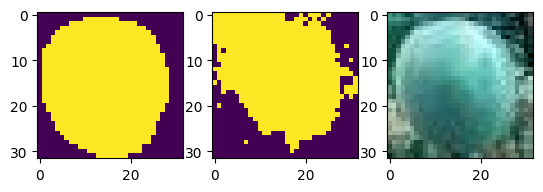

In [86]:
nomor = 2
plt.subplot(1, 3, 1)
plt.imshow(valid_labels[nomor])
#
plt.subplot(1, 3, 2)
plt.imshow(hasil[nomor])

plt.subplot(1, 3, 3)
plt.imshow(Image_Valid[nomor])
plt.show()

In [24]:
encoded_data.shape

(8640000, 4)

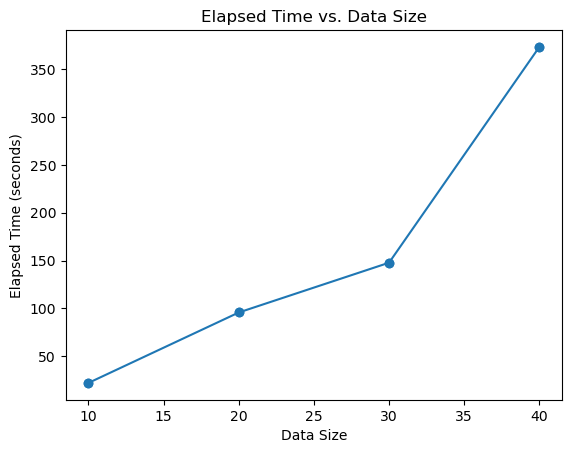

In [26]:
import matplotlib.pyplot as plt

data_sizes = [10, 20, 30, 40]
elapsed_times = [21.983306169509888, 95.64821100234985, 147.71245431900024, 373.3768091201782]

plt.scatter(data_sizes, elapsed_times)
plt.plot(data_sizes, elapsed_times, '-o')  # Connect the points with a line
plt.xlabel("Data Size")
plt.ylabel("Elapsed Time (seconds)")
plt.title("Elapsed Time vs. Data Size")

plt.show()


Fitted Parameters:
a = 8.472829344703037e-16
b = 0.9999999988949175
c = 45.43147790431976


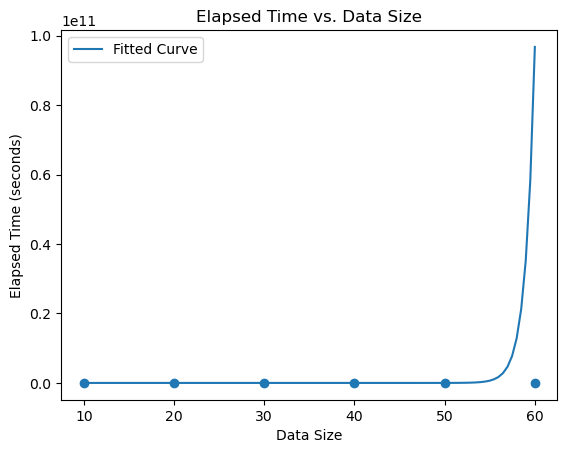

In [29]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

data_sizes = np.array([10, 20, 30, 40, 50, 60])
elapsed_times = np.array([21.983306169509888, 95.64821100234985, 147.71245431900024, 373.3768091201782, 470.18233370780945, 549.236412525177])

# Define the function to fit
def func(x, a, b, c):
    return a * np.exp(b * x) + c

# Perform curve fitting
popt, _ = curve_fit(func, data_sizes, elapsed_times)

# Extract the fitted parameters
a_fit, b_fit, c_fit = popt

# Print the fitted parameters
print("Fitted Parameters:")
print("a =", a_fit)
print("b =", b_fit)
print("c =", c_fit)

# Generate the curve using the fitted parameters
x_vals = np.linspace(min(data_sizes), max(data_sizes), 100)
y_vals = func(x_vals, a_fit, b_fit, c_fit)

# Plot the data and the curve
plt.scatter(data_sizes, elapsed_times)
plt.plot(x_vals, y_vals, label='Fitted Curve')
plt.xlabel("Data Size")
plt.ylabel("Elapsed Time (seconds)")
plt.title("Elapsed Time vs. Data Size")
plt.legend()

plt.show()


Fitted Parameters:
a = 0.03676982175118442
b = 8.81334751136028
c = -87.87813792469258


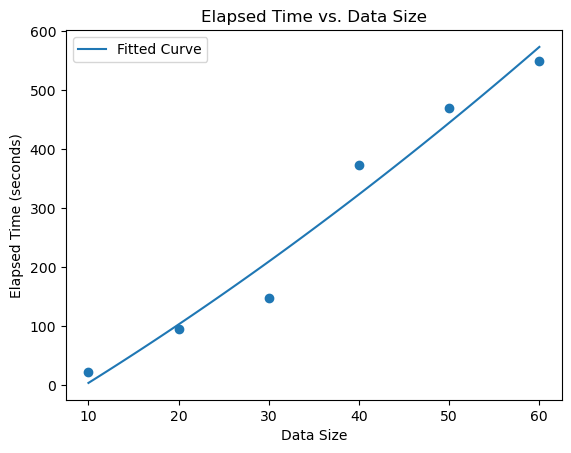

In [30]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

data_sizes = np.array([10, 20, 30, 40, 50, 60])
elapsed_times = np.array([21.983306169509888, 95.64821100234985, 147.71245431900024, 373.3768091201782, 470.18233370780945, 549.236412525177])

# Define the function to fit (quadratic function)
def func(x, a, b, c):
    return a * x**2 + b * x + c

# Perform curve fitting
popt, _ = curve_fit(func, data_sizes, elapsed_times)

# Extract the fitted parameters
a_fit, b_fit, c_fit = popt

# Print the fitted parameters
print("Fitted Parameters:")
print("a =", a_fit)
print("b =", b_fit)
print("c =", c_fit)

# Generate the curve using the fitted parameters
x_vals = np.linspace(min(data_sizes), max(data_sizes), 100)
y_vals = func(x_vals, a_fit, b_fit, c_fit)

# Plot the data and the curve
plt.scatter(data_sizes, elapsed_times)
plt.plot(x_vals, y_vals, label='Fitted Curve')
plt.xlabel("Data Size")
plt.ylabel("Elapsed Time (seconds)")
plt.title("Elapsed Time vs. Data Size")
plt.legend()

plt.show()


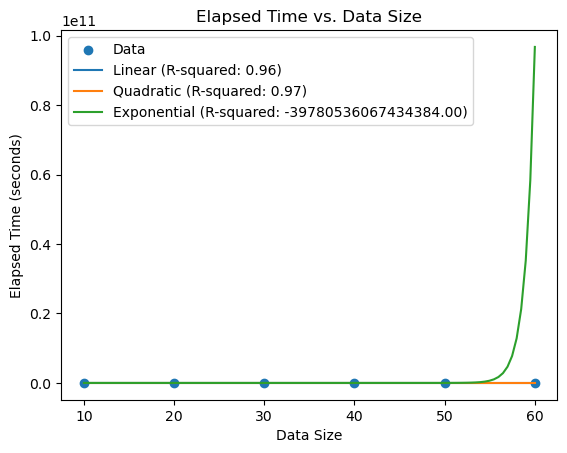

In [31]:
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

data_sizes = np.array([10, 20, 30, 40, 50, 60])
elapsed_times = np.array([21.983306169509888, 95.64821100234985, 147.71245431900024, 373.3768091201782, 470.18233370780945, 549.236412525177])

# Linear function
def linear_func(x, a, b):
    return a * x + b

# Quadratic function
def quadratic_func(x, a, b, c):
    return a * x**2 + b * x + c

# Exponential function
def exponential_func(x, a, b, c):
    return a * np.exp(b * x) + c

# Perform curve fitting for each function
linear_popt, _ = curve_fit(linear_func, data_sizes, elapsed_times)
quadratic_popt, _ = curve_fit(quadratic_func, data_sizes, elapsed_times)
exponential_popt, _ = curve_fit(exponential_func, data_sizes, elapsed_times)

# Generate the curves using the fitted parameters
x_vals = np.linspace(min(data_sizes), max(data_sizes), 100)
linear_y_vals = linear_func(x_vals, *linear_popt)
quadratic_y_vals = quadratic_func(x_vals, *quadratic_popt)
exponential_y_vals = exponential_func(x_vals, *exponential_popt)

# Calculate R-squared for each function
linear_r2 = r2_score(elapsed_times, linear_func(data_sizes, *linear_popt))
quadratic_r2 = r2_score(elapsed_times, quadratic_func(data_sizes, *quadratic_popt))
exponential_r2 = r2_score(elapsed_times, exponential_func(data_sizes, *exponential_popt))

# Plot the data and the fitted curves
plt.scatter(data_sizes, elapsed_times, label='Data')
plt.plot(x_vals, linear_y_vals, label=f'Linear (R-squared: {linear_r2:.2f})')
plt.plot(x_vals, quadratic_y_vals, label=f'Quadratic (R-squared: {quadratic_r2:.2f})')
plt.plot(x_vals, exponential_y_vals, label=f'Exponential (R-squared: {exponential_r2:.2f})')
plt.xlabel("Data Size")
plt.ylabel("Elapsed Time (seconds)")
plt.title("Elapsed Time vs. Data Size")
plt.legend()

plt.show()


0.8656336708490728


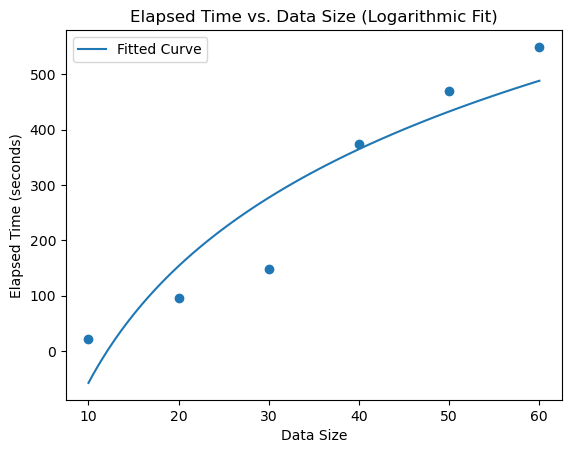

In [34]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

data_sizes = np.array([10, 20, 30, 40, 50, 60])
elapsed_times = np.array([21.983306169509888, 95.64821100234985, 147.71245431900024, 373.3768091201782, 470.18233370780945, 549.236412525177])

# Define the logarithmic function
def logarithmic_func(x, a, b):
    return a * np.log(x) + b

# Perform curve fitting
popt, _ = curve_fit(logarithmic_func, data_sizes, elapsed_times)

logarithmic_r2 = r2_score(elapsed_times, logarithmic_func(data_sizes, *popt))
print(logarithmic_r2)
# Generate the curve using the fitted parameters
x_vals = np.linspace(min(data_sizes), max(data_sizes), 100)
y_vals = logarithmic_func(x_vals, *popt)

# Plot the data and the curve
plt.scatter(data_sizes, elapsed_times)
plt.plot(x_vals, y_vals, label='Fitted Curve')
plt.xlabel("Data Size")
plt.ylabel("Elapsed Time (seconds)")
plt.title("Elapsed Time vs. Data Size (Logarithmic Fit)")
plt.legend()

plt.show()


0.9621258183714236


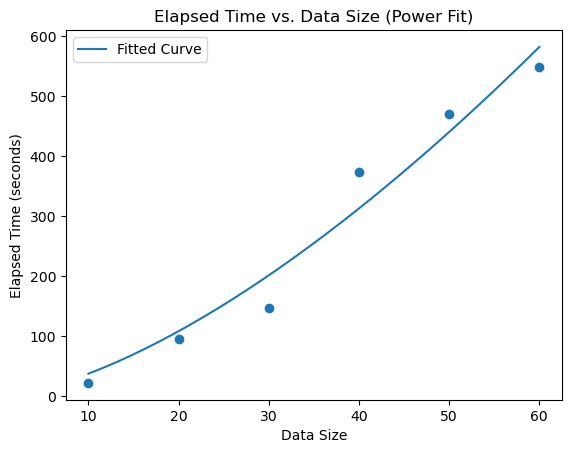

In [35]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

data_sizes = np.array([10, 20, 30, 40, 50, 60])
elapsed_times = np.array([21.983306169509888, 95.64821100234985, 147.71245431900024, 373.3768091201782, 470.18233370780945, 549.236412525177])

# Define the power function
def power_func(x, a, b):
    return a * np.power(x, b)

# Perform curve fitting
popt, _ = curve_fit(power_func, data_sizes, elapsed_times)


logarithmic_r2 = r2_score(elapsed_times, power_func(data_sizes, *popt))
print(logarithmic_r2)
# Generate the curve using the fitted parameters
x_vals = np.linspace(min(data_sizes), max(data_sizes), 100)
y_vals = power_func(x_vals, *popt)

# Plot the data and the curve
plt.scatter(data_sizes, elapsed_times)
plt.plot(x_vals, y_vals, label='Fitted Curve')
plt.xlabel("Data Size")
plt.ylabel("Elapsed Time (seconds)")
plt.title("Elapsed Time vs. Data Size (Power Fit)")
plt.legend()

plt.show()


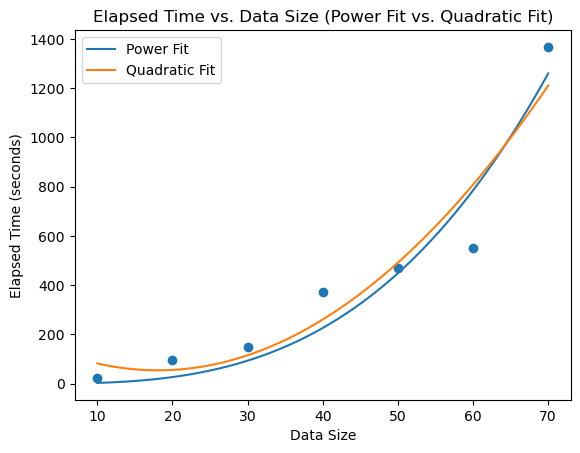

In [36]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

data_sizes = np.array([10, 20, 30, 40, 50, 60, 70])
elapsed_times = np.array([21.983306169509888, 95.64821100234985, 147.71245431900024, 373.3768091201782, 470.18233370780945, 549.236412525177, 1367.4980640411377])

# Define the power function
def power_func(x, a, b):
    return a * np.power(x, b)

# Define the quadratic function
def quadratic_func(x, a, b, c):
    return a * np.power(x, 2) + b * x + c

# Perform curve fitting for power function
power_popt, _ = curve_fit(power_func, data_sizes, elapsed_times)

# Perform curve fitting for quadratic function
quadratic_popt, _ = curve_fit(quadratic_func, data_sizes, elapsed_times)

# Generate the curves using the fitted parameters
x_vals = np.linspace(min(data_sizes), max(data_sizes), 100)
y_power = power_func(x_vals, *power_popt)
y_quadratic = quadratic_func(x_vals, *quadratic_popt)

# Plot the data and the curves
plt.scatter(data_sizes, elapsed_times)
plt.plot(x_vals, y_power, label='Power Fit')
plt.plot(x_vals, y_quadratic, label='Quadratic Fit')
plt.xlabel("Data Size")
plt.ylabel("Elapsed Time (seconds)")
plt.title("Elapsed Time vs. Data Size (Power Fit vs. Quadratic Fit)")
plt.legend()

plt.show()


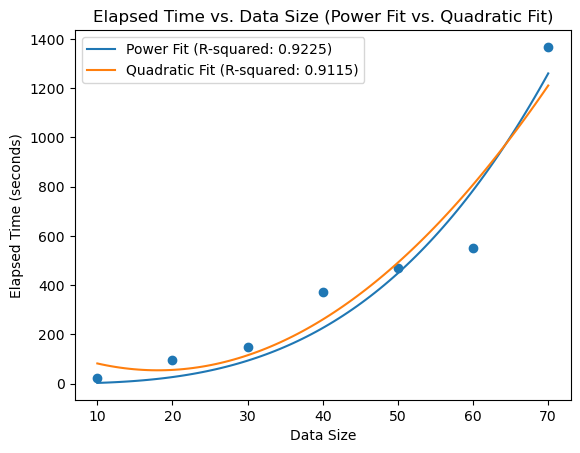

In [37]:
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

data_sizes = np.array([10, 20, 30, 40, 50, 60, 70])
elapsed_times = np.array([21.983306169509888, 95.64821100234985, 147.71245431900024, 373.3768091201782, 470.18233370780945, 549.236412525177, 1367.4980640411377])

# Define the power function
def power_func(x, a, b):
    return a * np.power(x, b)

# Define the quadratic function
def quadratic_func(x, a, b, c):
    return a * np.power(x, 2) + b * x + c

# Perform curve fitting for power function
power_popt, _ = curve_fit(power_func, data_sizes, elapsed_times)

# Perform curve fitting for quadratic function
quadratic_popt, _ = curve_fit(quadratic_func, data_sizes, elapsed_times)

# Generate the curves using the fitted parameters
x_vals = np.linspace(min(data_sizes), max(data_sizes), 100)
y_power = power_func(x_vals, *power_popt)
y_quadratic = quadratic_func(x_vals, *quadratic_popt)

# Calculate R-squared for power function
power_r2 = r2_score(elapsed_times, power_func(data_sizes, *power_popt))

# Calculate R-squared for quadratic function
quadratic_r2 = r2_score(elapsed_times, quadratic_func(data_sizes, *quadratic_popt))

# Plot the data and the curves
plt.scatter(data_sizes, elapsed_times)
plt.plot(x_vals, y_power, label='Power Fit (R-squared: {:.4f})'.format(power_r2))
plt.plot(x_vals, y_quadratic, label='Quadratic Fit (R-squared: {:.4f})'.format(quadratic_r2))
plt.xlabel("Data Size")
plt.ylabel("Elapsed Time (seconds)")
plt.title("Elapsed Time vs. Data Size (Power Fit vs. Quadratic Fit)")
plt.legend()

plt.show()
